In [1]:
import numpy as np
import matplotlib.pyplot as plt
import process_data
import plot_functions

In [153]:
from compare_clusterings import *
from plot_functions import *
from process_data import *
from visualizations import *

In [3]:
from solar import *

# This simulation involves simple motions of some solar-system like bodies (3 planets moving around a sun following Newton's law of motion, integration is done using the Runge-Kutta-4 method), some of these systems are simulated (see animation).

In [4]:
initial_conditions_3d = [
    (0.0, 0.0, 0.0, 0.0, 0.0, 0.0),                # Sun
    (1.0, 0.0, 0.0, 0.0, 2 * np.pi, 0.0),                # Earth
    (5.2, 0.0, 0.0, 0.0, 2 * np.pi / np.sqrt(5.2), 0.0), # Jupiter
    (1.5, 0.0, 0.0, 0.0, 2 * np.pi / np.sqrt(1.5), 0.0)  # Mars
]

# Masses of the Sun and the planets
masses = [1.0, 3.003e-6, 9.545e-4, 3.213e-7]  # Sun, Earth, Jupiter, Mars


com_velocity = (0.0, 2 * np.pi, 0.0)  # In AU/year
# simulation
#positions_3d_with_com_motion = return_planets_3d_with_com_motion(initial_conditions_3d, masses, com_velocity)

system_parameters = [{'com_velocity': (0.0, 2 * np.pi, 0.0), 'radius':1, 'period':1, 'linear_period' : 1},
            {'com_velocity': (0.0, 2 * np.pi, 0.0), 'radius':None, 'period':1, 'linear_period' : 1},
            {'com_velocity': (0.0, 2 * np.pi, 0.0), 'radius':1, 'period':1, 'linear_period' : None},
            {'com_velocity': (0.0, 0, 0.0), 'radius':None, 'period':1, 'linear_period' : 1}

]

In [5]:
trajectories = create_system()

In [6]:
%matplotlib notebook

ann = plot_functions.plot_traj_labels_plt(trajectories, interval = 10, save_video=False)

<IPython.core.display.Javascript object>

/home/jalh/Desktop/comet/plot_functions.py:453: UserWarning: Attempting to set identical low and high zlims makes transformation singular; automatically expanding.
  ax.set_zlim(np.min(np.array(particles)[:,:,2].flatten()), np.max(np.array(particles)[:,:,2].flatten()))


In [7]:
from IPython.display import HTML
HTML(ann.to_html5_video())

## preprocessing of the trajectory data so that it can be used by COMET

In [8]:
df = process_data.create_clustering_df(trajectories)

### apply some of the clustering procedures 

In [9]:
import redpandda_general
res_hdbscan = redpandda_general.main_clustering_general(df, None, clustering_algorithm="hdbscan")

0.0098


In [10]:
res_hdbscan

(array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3]),
 1.2458067358396818,
 array([[0.00000000e+00, 1.33821010e-03, 1.64228110e-04, 5.73068985e-04,
         4.16428521e-01, 1.27304150e-01, 3.85997369e-01, 4.50123060e-01,
         4.78249065e-01, 5.61620239e-01, 2.93020191e-01, 5.18214092e-01,
         4.80523260e-01, 4.56019328e-01, 4.23695223e-01, 5.06044867e-01],
        [1.33821010e-03, 0.00000000e+00, 3.73586780e-01, 1.71885949e-01,
         8.02388138e-01, 4.16428521e-01, 7.38389523e-01, 6.13763921e-01,
         5.32468143e-01, 4.78249065e-01, 4.05319260e-01, 5.48830715e-01,
         7.93121451e-01, 4.80523260e-01, 7.43259435e-01, 7.91585894e-01],
        [1.64228110e-04, 3.73586780e-01, 0.00000000e+00, 2.85595448e-01,
         3.73890348e-01, 1.48785164e-01, 4.16428521e-01, 4.40066554e-01,
         5.99622460e-01, 6.28874798e-01, 4.78249065e-01, 7.67005733e-01,
         5.86035981e-01, 5.87774360e-01, 4.80523260e-01, 8.07420174e-01],
        [5.73068985e-04, 1.71885949e-01, 2

In [11]:
%matplotlib inline

res_hdbscan_2std = redpandda_general.main_clustering_general_std(df, None, clustering_algorithm="hdbscan")

0.0010


In [12]:
res_hdbscan_2std

(array([ 0,  0,  1,  0, -1,  1,  1, -1, -1,  1,  0,  1, -1, -1,  0,  1]),
 3.9573589626613783,
 array([[1.        , 0.99500501, 0.99930607, 0.99764095, 0.76503607,
         0.90030168, 0.65290646, 0.65551833, 0.51522346, 0.45453851,
         0.29060605, 0.47135161, 0.56027502, 0.54620966, 0.32122347,
         0.4814763 ],
        [0.99500501, 1.        , 0.7534722 , 0.76621363, 0.59037093,
         0.76503607, 0.47392911, 0.58886924, 0.48728187, 0.51522346,
         0.24417662, 0.41291447, 0.4998602 , 0.56027502, 0.22071379,
         0.36925351],
        [0.99930607, 0.7534722 , 1.        , 0.65003492, 0.5861983 ,
         0.64610168, 0.76503607, 0.39122735, 0.27797733, 0.2235496 ,
         0.51522346, 0.00576432, 0.27822933, 0.30253001, 0.56027502,
         0.        ],
        [0.99764095, 0.76621363, 0.65003492, 1.        , 0.65728113,
         0.66998864, 0.56839391, 0.76503607, 0.35621161, 0.30596722,
         0.32838646, 0.51522346, 0.41870779, 0.35771415, 0.3936894 ,
         0.

In [13]:
res_specvar = redpandda_general.main_clustering_general_std(df, None)

0.0012


In [14]:
import redpandda_general
res_hdbscan = redpandda_general.main_clustering_general(df, None, clustering_algorithm="hdbscan")

0.0013


In [15]:
res_hdbscan

(array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3]),
 1.2458067358396818,
 array([[0.00000000e+00, 1.33821010e-03, 1.64228110e-04, 5.73068985e-04,
         4.16428521e-01, 1.27304150e-01, 3.85997369e-01, 4.50123060e-01,
         4.78249065e-01, 5.61620239e-01, 2.93020191e-01, 5.18214092e-01,
         4.80523260e-01, 4.56019328e-01, 4.23695223e-01, 5.06044867e-01],
        [1.33821010e-03, 0.00000000e+00, 3.73586780e-01, 1.71885949e-01,
         8.02388138e-01, 4.16428521e-01, 7.38389523e-01, 6.13763921e-01,
         5.32468143e-01, 4.78249065e-01, 4.05319260e-01, 5.48830715e-01,
         7.93121451e-01, 4.80523260e-01, 7.43259435e-01, 7.91585894e-01],
        [1.64228110e-04, 3.73586780e-01, 0.00000000e+00, 2.85595448e-01,
         3.73890348e-01, 1.48785164e-01, 4.16428521e-01, 4.40066554e-01,
         5.99622460e-01, 6.28874798e-01, 4.78249065e-01, 7.67005733e-01,
         5.86035981e-01, 5.87774360e-01, 4.80523260e-01, 8.07420174e-01],
        [5.73068985e-04, 1.71885949e-01, 2

#### and also plot the heatmap of delta-distances

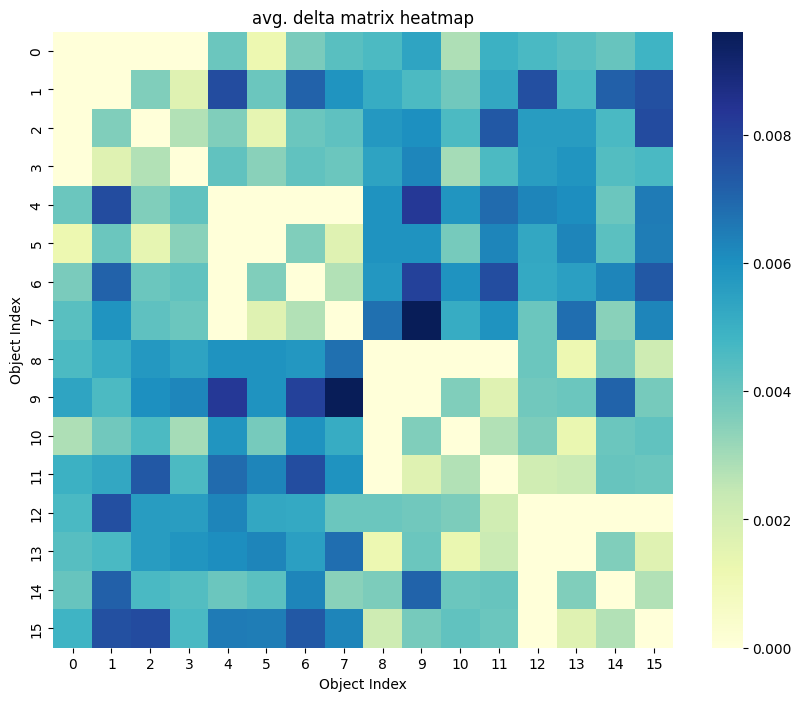

0.3489


In [16]:
res = redpandda_general.main_clustering_general(df, 2)

In [17]:
res_hdbscan = redpandda_general.main_clustering_general(df, None, clustering_algorithm="hdbscan", min_cluster_size=2, min_samples=1)

0.0011


In [18]:
res_hdbscan

(array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3]),
 1.2458067358396818,
 array([[0.00000000e+00, 1.33821010e-03, 1.64228110e-04, 5.73068985e-04,
         4.16428521e-01, 1.27304150e-01, 3.85997369e-01, 4.50123060e-01,
         4.78249065e-01, 5.61620239e-01, 2.93020191e-01, 5.18214092e-01,
         4.80523260e-01, 4.56019328e-01, 4.23695223e-01, 5.06044867e-01],
        [1.33821010e-03, 0.00000000e+00, 3.73586780e-01, 1.71885949e-01,
         8.02388138e-01, 4.16428521e-01, 7.38389523e-01, 6.13763921e-01,
         5.32468143e-01, 4.78249065e-01, 4.05319260e-01, 5.48830715e-01,
         7.93121451e-01, 4.80523260e-01, 7.43259435e-01, 7.91585894e-01],
        [1.64228110e-04, 3.73586780e-01, 0.00000000e+00, 2.85595448e-01,
         3.73890348e-01, 1.48785164e-01, 4.16428521e-01, 4.40066554e-01,
         5.99622460e-01, 6.28874798e-01, 4.78249065e-01, 7.67005733e-01,
         5.86035981e-01, 5.87774360e-01, 4.80523260e-01, 8.07420174e-01],
        [5.73068985e-04, 1.71885949e-01, 2

In [19]:
res

(array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]),
 2.851508939156154,
 [],
 [array([[ 0],
         [ 1],
         [ 2],
         [ 3],
         [ 4],
         [ 5],
         [ 6],
         [ 7],
         [ 8],
         [ 9],
         [10],
         [11],
         [12],
         [13],
         [14],
         [15]]),
  array([[ 0],
         [ 1],
         [ 2],
         [ 3],
         [ 4],
         [ 5],
         [ 6],
         [ 7],
         [ 8],
         [ 9],
         [10],
         [11],
         [12],
         [13],
         [14],
         [15]]),
  array([[ 0],
         [ 1],
         [ 2],
         [ 3],
         [ 4],
         [ 5],
         [ 6],
         [ 7],
         [ 8],
         [ 9],
         [10],
         [11],
         [12],
         [13],
         [14],
         [15]]),
  array([[ 0],
         [ 1],
         [ 2],
         [ 3],
         [ 4],
         [ 5],
         [ 6],
         [ 7],
         [ 8],
         [ 9],
         [10],
         [11],
         [1

In [20]:
res_agglon = redpandda_general.main_clustering_general(df, None, clustering_algorithm="agglomerative")

something wrong with clustering Q computation


In [21]:
res_agglon

(array([ 0,  8,  0, 11,  3, 10,  3,  6,  2,  9,  2,  4,  1,  5,  1,  7]),
 [],
 array([[0.00000000e+00, 1.33821010e-03, 1.64228110e-04, 5.73068985e-04,
         4.16428521e-01, 1.27304150e-01, 3.85997369e-01, 4.50123060e-01,
         4.78249065e-01, 5.61620239e-01, 2.93020191e-01, 5.18214092e-01,
         4.80523260e-01, 4.56019328e-01, 4.23695223e-01, 5.06044867e-01],
        [1.33821010e-03, 0.00000000e+00, 3.73586780e-01, 1.71885949e-01,
         8.02388138e-01, 4.16428521e-01, 7.38389523e-01, 6.13763921e-01,
         5.32468143e-01, 4.78249065e-01, 4.05319260e-01, 5.48830715e-01,
         7.93121451e-01, 4.80523260e-01, 7.43259435e-01, 7.91585894e-01],
        [1.64228110e-04, 3.73586780e-01, 0.00000000e+00, 2.85595448e-01,
         3.73890348e-01, 1.48785164e-01, 4.16428521e-01, 4.40066554e-01,
         5.99622460e-01, 6.28874798e-01, 4.78249065e-01, 7.67005733e-01,
         5.86035981e-01, 5.87774360e-01, 4.80523260e-01, 8.07420174e-01],
        [5.73068985e-04, 1.71885949e-01, 2

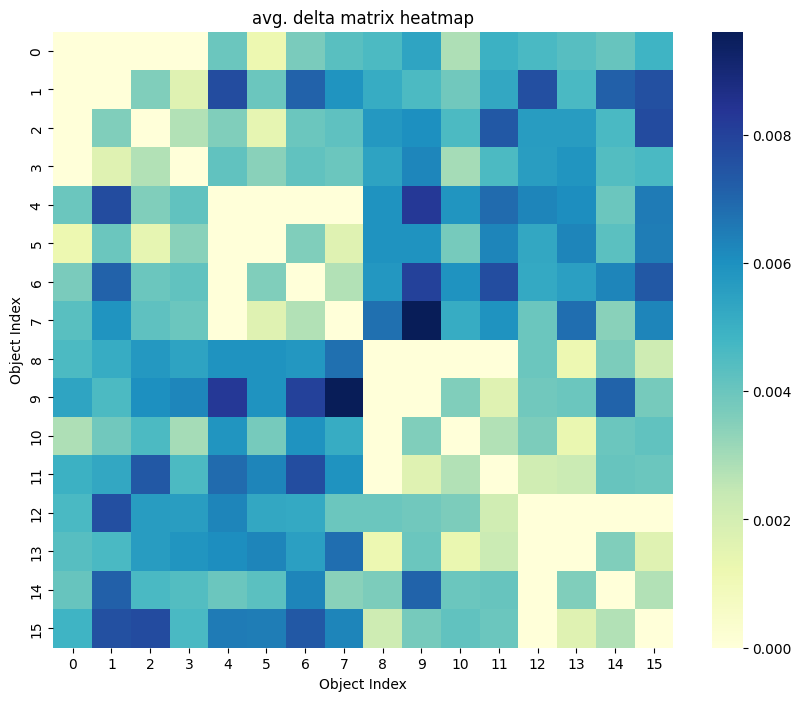

0.3220


In [22]:
res = redpandda_general.main_clustering_general(df, 6)

In [23]:
res_hdbscan = redpandda_general.main_clustering_general(df, None, clustering_algorithm="hdbscan")

0.0011


In [24]:
res_hdbscan

(array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3]),
 1.2458067358396818,
 array([[0.00000000e+00, 1.33821010e-03, 1.64228110e-04, 5.73068985e-04,
         4.16428521e-01, 1.27304150e-01, 3.85997369e-01, 4.50123060e-01,
         4.78249065e-01, 5.61620239e-01, 2.93020191e-01, 5.18214092e-01,
         4.80523260e-01, 4.56019328e-01, 4.23695223e-01, 5.06044867e-01],
        [1.33821010e-03, 0.00000000e+00, 3.73586780e-01, 1.71885949e-01,
         8.02388138e-01, 4.16428521e-01, 7.38389523e-01, 6.13763921e-01,
         5.32468143e-01, 4.78249065e-01, 4.05319260e-01, 5.48830715e-01,
         7.93121451e-01, 4.80523260e-01, 7.43259435e-01, 7.91585894e-01],
        [1.64228110e-04, 3.73586780e-01, 0.00000000e+00, 2.85595448e-01,
         3.73890348e-01, 1.48785164e-01, 4.16428521e-01, 4.40066554e-01,
         5.99622460e-01, 6.28874798e-01, 4.78249065e-01, 7.67005733e-01,
         5.86035981e-01, 5.87774360e-01, 4.80523260e-01, 8.07420174e-01],
        [5.73068985e-04, 1.71885949e-01, 2

In [25]:
res_specvar = redpandda_general.main_clustering_general_std(df, None)

0.0011


In [26]:
res_specvar_distance = redpandda_general.main_clustering_general_std_distance(df, None)

0.0013


In [27]:
result_labels = res[0]

In [28]:
result_labels

array([1, 1, 5, 1, 4, 5, 4, 4, 2, 2, 1, 2, 3, 0, 3, 0])

# We can also call the functions for obtaining delta matrices etc. directly

In [31]:
traj_array, point_array, frames_count, n_objects = redpandda_general.prepare_data_from_df(df)

In [32]:
dist_matrices = redpandda_general.get_distance_matrices(traj_array)
delta_matrices = redpandda_general.get_delta_matrices(dist_matrices)
average_delta_matrix = redpandda_general.calculate_average_delta_matrix(delta_matrices)

std_delta_matrix = redpandda_general.get_std_matrices(dist_matrices)

In [34]:
summed_delta_matrix = average_delta_matrix

### variants with added standard deviation

In [35]:
summed_delta_matrix_1std = summed_delta_matrix + std_delta_matrix 
summed_delta_matrix_2std = summed_delta_matrix + std_delta_matrix * 2

In [36]:
from distance_matrix import *

In [37]:
normed_delta_matrix = 1 - normed_values(summed_delta_matrix)
normed_delta_matrix_1std = 1 - normed_values(summed_delta_matrix_1std)
normed_delta_matrix_2std = 1 - normed_values(summed_delta_matrix_2std)

In [38]:
normed_similarity_matrix = 1 - normed_values(summed_delta_matrix)
normed_similarity_matrix_1std = 1 - normed_values(summed_delta_matrix_1std)
normed_similarity_matrix_2std = 1 - normed_values(summed_delta_matrix_2std)

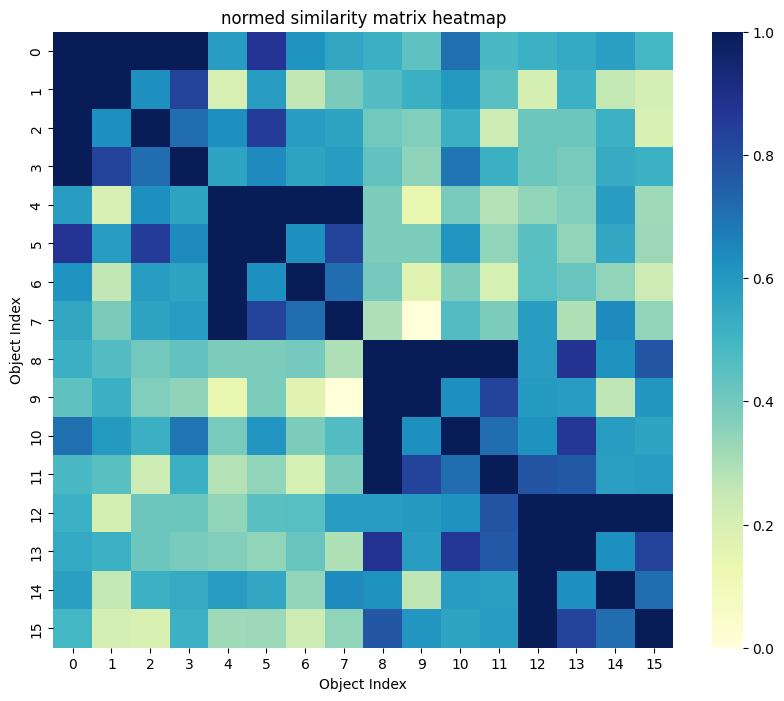

In [39]:
create_delta_heatmap(normed_similarity_matrix, title="normed similarity matrix heatmap")

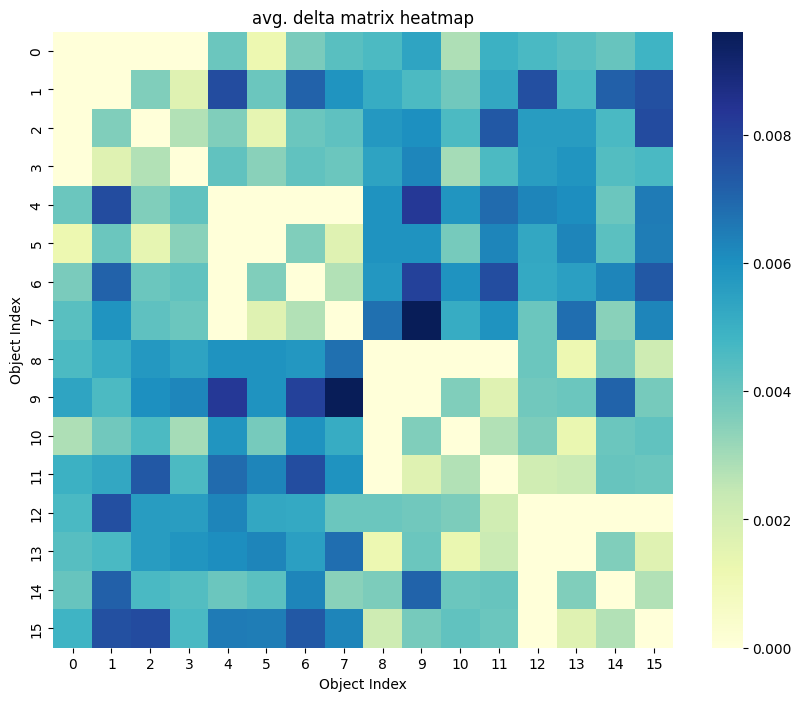

In [40]:
import distance_matrix
distance_matrix.create_delta_heatmap(average_delta_matrix, title="avg. delta matrix heatmap")

### several clusterings which we later use for plotting / comparing 

In [57]:
clustering = SpectralClustering(n_clusters=6, affinity='precomputed')
result_spectral_6 = clustering.fit(normed_similarity_matrix)

clustering = SpectralClustering(n_clusters=3, affinity='precomputed')
result_spectral_3 = clustering.fit(normed_similarity_matrix)

In [58]:
clustering = SpectralClustering(n_clusters=4, affinity='precomputed')
result_spectral_4 = clustering.fit(normed_similarity_matrix)

In [59]:
clustering = SpectralClustering(n_clusters=6, affinity='precomputed', assign_labels="discretize")
result_spectral_6_discr = clustering.fit(normed_similarity_matrix)

In [60]:
clustering = SpectralClustering(n_clusters=6, affinity='precomputed', assign_labels="discretize")
result_spectral_6_discr = clustering.fit(normed_similarity_matrix)
result_spectral_6_discr.labels_

array([0, 3, 0, 3, 2, 0, 2, 5, 4, 4, 4, 4, 1, 1, 1, 1])

In [61]:
clustering = SpectralClustering(n_clusters=3, affinity='precomputed', assign_labels="discretize")
result_spectral_3_discr = clustering.fit(normed_similarity_matrix)
result_spectral_3_discr.labels_

array([0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1])

In [62]:
clustering = SpectralClustering(n_clusters=6, affinity='precomputed', assign_labels="cluster_qr")
result_spectral_6_discr = clustering.fit(normed_similarity_matrix)
result_spectral_6_discr.labels_

array([2, 2, 3, 2, 4, 3, 0, 4, 1, 1, 2, 1, 5, 5, 5, 5])

In [63]:
clustering = SpectralClustering(n_clusters=6, affinity='precomputed')
result_spectral_6_discr = clustering.fit(normed_similarity_matrix)
result_spectral_6_discr.labels_

array([2, 2, 4, 2, 0, 4, 1, 0, 3, 3, 3, 3, 5, 1, 5, 5], dtype=int32)

In [64]:
result_spectral_3.labels_

array([1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [65]:
result_spectral_6.labels_

array([4, 4, 1, 4, 3, 1, 0, 3, 2, 2, 2, 2, 5, 0, 5, 5], dtype=int32)

In [66]:
result_spectral_6_discr.labels_

array([2, 2, 4, 2, 0, 4, 1, 0, 3, 3, 3, 3, 5, 1, 5, 5], dtype=int32)

In [67]:
distance_matrix.spectral_clustering_on_deltas(summed_delta_matrix, 6)

0.0054


array([0, 0, 0, 5, 3, 1, 3, 4, 1, 1, 5, 5, 2, 2, 2, 2])

In [68]:
normed_similarity_matrix = 1 - normed_values(summed_delta_matrix)


In [69]:
clustering = SpectralClustering(n_clusters=6, affinity='precomputed')
result = clustering.fit(summed_delta_matrix_2std)
print(result.labels_)

[5 0 1 3 4 0 0 1 3 1 0 0 2 1 1 0]


In [70]:
import hdbscan

clustering = hdbscan.HDBSCAN(min_cluster_size=4, min_samples=2, metric='precomputed') 

result_hdbscan_4_2 = clustering.fit(summed_delta_matrix.astype(np.float64))

print(result_hdbscan_4_2.labels_)

[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]


In [71]:
import hdbscan

clustering = hdbscan.HDBSCAN(min_cluster_size=4, min_samples=2, metric='precomputed') 


result_hdbscan_4_2_1std = clustering.fit(summed_delta_matrix_1std.astype(np.float64))

print(result_hdbscan_4_2_1std.labels_)

[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]


In [72]:
import hdbscan

clustering = hdbscan.HDBSCAN(min_cluster_size=2, min_samples=2, metric='precomputed') 


result_hdbscan_2_2_2std = clustering.fit(summed_delta_matrix_2std.astype(np.float64))

print(result_hdbscan_2_2_2std.labels_)

[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]


In [73]:
normed_delta_matrix = normed_values(summed_delta_matrix)
normed_delta_matrix_1std = normed_values(summed_delta_matrix_1std)
normed_delta_matrix_2std =  normed_values(summed_delta_matrix_2std)

In [74]:
spectral_clustering_on_deltas(average_delta_matrix, 6)

0.0070


array([3, 3, 3, 5, 2, 0, 2, 4, 0, 0, 5, 5, 1, 1, 1, 1])

In [75]:
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0.1, affinity='precomputed', linkage='complete')

result_agglo_compl_dt01 = clustering.fit(average_delta_matrix)

In [76]:

clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0.7, metric='precomputed', linkage='complete')

result_agglo_compl_dt07_2std  = clustering.fit(summed_delta_matrix_2std)

In [77]:

clustering = AgglomerativeClustering(n_clusters=3, metric='precomputed', linkage='complete')

result_agglo_cl3  = clustering.fit(average_delta_matrix)

In [78]:
result_agglo_compl_dt01.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [79]:
result_agglo_cl3.labels_

array([1, 1, 1, 1, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0])

In [80]:
import hdbscan

clustering = hdbscan.HDBSCAN(min_cluster_size=2, min_samples=2, metric='precomputed') 


result_hdbscan_2_2 = clustering.fit(summed_delta_matrix.astype(np.float64))

print(result_hdbscan_2_2.labels_)

[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]


In [81]:
result_hdbscan_2_2_2std.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [82]:
groups_list = np.array(trajectories)[:,:,-1]
num_groups = len(np.unique(np.array(groups_list).flatten()))

In [83]:
true_labels = groups_list[:,0]

In [84]:
true_labels

array([0., 0., 0., 0., 1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.])

In [85]:
residue_items = list(range(len(true_labels)))

In [86]:
import visualizations


In [88]:
from sklearn.cluster import AffinityPropagation

In [89]:
clustering_aff = AffinityPropagation(random_state=5, affinity="precomputed").fit(normed_similarity_matrix.astype(np.float64))
clustering_aff_1std = AffinityPropagation(random_state=5, affinity="precomputed").fit(normed_similarity_matrix_1std.astype(np.float64))
clustering_aff_2std = AffinityPropagation(random_state=5, affinity="precomputed").fit(normed_similarity_matrix_2std.astype(np.float64))

In [90]:
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [91]:
clustering_aff_1std.labels_

array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3])

In [92]:
clustering_aff_2std.labels_

array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3])

In [93]:
res_hdbscan_2_1 = redpandda_general.main_clustering_general(df, None, clustering_algorithm="hdbscan", min_cluster_size=2, min_samples=1)

0.0017


#### For spectral clustering, we can also visualize the silhouette plots

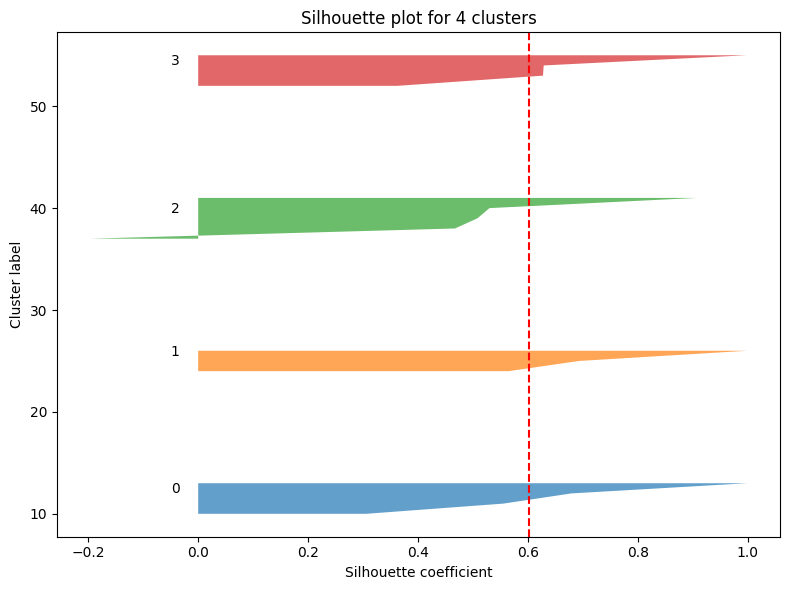

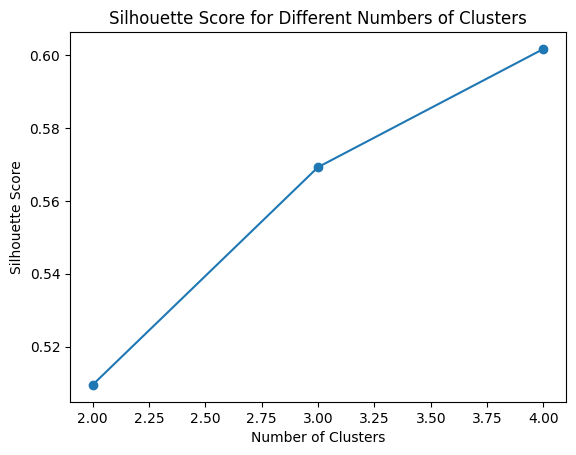

0.3534


In [94]:
spectral_opt_sil = distance_matrix.spectral_clustering_on_deltas(summed_delta_matrix, cluster_count=None, silhouette = True)
spectral_opt_sil = list(spectral_opt_sil)


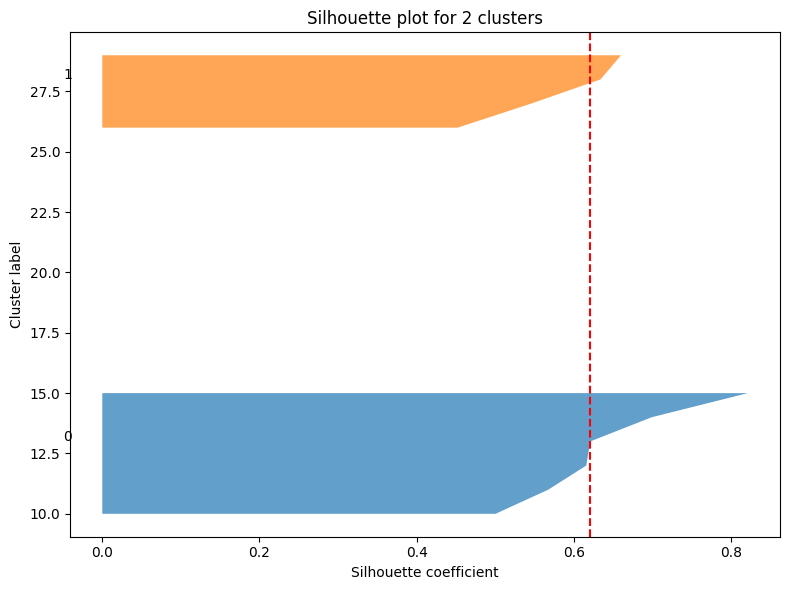

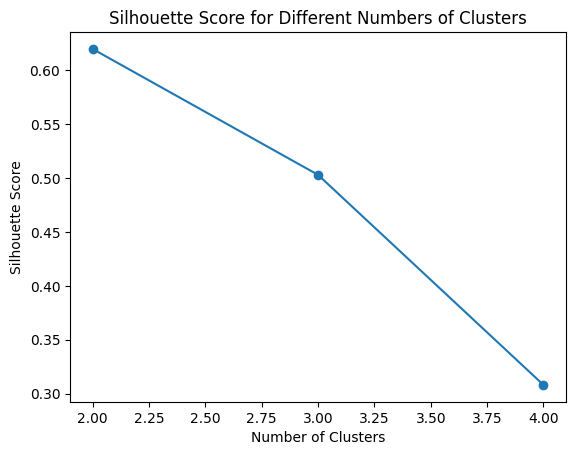

0.3781


In [95]:
spectral_opt_sil_1std = distance_matrix.spectral_clustering_on_deltas(summed_delta_matrix_1std, cluster_count=None, silhouette = True)
spectral_opt_sil_1std = list(spectral_opt_sil_1std)

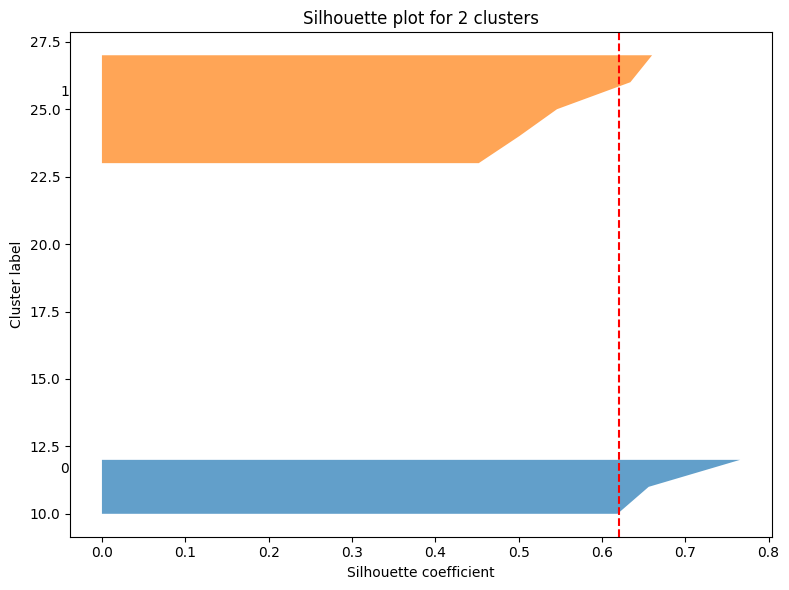

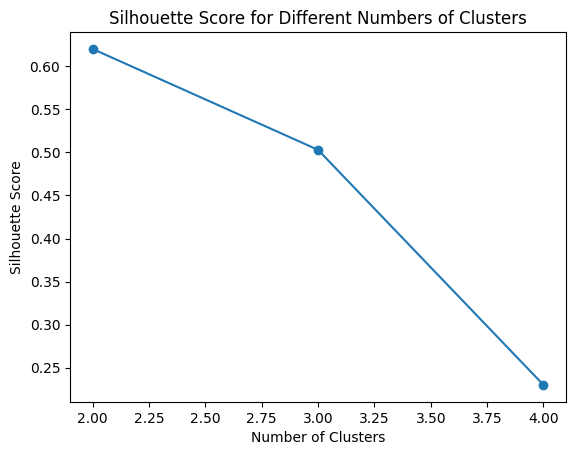

0.4576


In [96]:
spectral_opt_sil_2std = distance_matrix.spectral_clustering_on_deltas(summed_delta_matrix_2std, cluster_count=None, silhouette = True)
spectral_opt_sil_2std = list(spectral_opt_sil_2std)

In [ ]:
clustering_names = []
clustering_results = []

clustering_names.append("hdbscan, min_cluster:2, min_samples:1")
clustering_results.append(list(res_hdbscan_2_1[0]))
clustering_names.append("hdbscan, +2std, min_cluster:2, min_samples:1")
clustering_results.append(list(res_hdbscan_2std[0]))

clustering_names.append("hdbscan, min_cluster:2, min_samples:2")
clustering_results.append(list(result_hdbscan_2_2.labels_))
clustering_names.append("hdbscan, +2std, min_cluster:2, min_samples:2")
clustering_results.append(list(result_hdbscan_2_2_2std.labels_))
clustering_names.append("hdbscan, min_cluster:4, min_samples:2")
clustering_results.append(list(result_hdbscan_4_2.labels_))
clustering_names.append("hdbscan, +1std, min_cluster:4, min_samples:2")
clustering_results.append(list(result_hdbscan_4_2_1std.labels_))



clustering_names.append("spectral,  clusters:6")
clustering_results.append(list(result_spectral_6.labels_))
clustering_names.append("spectral,  clusters:3")
clustering_results.append(list(result_spectral_3.labels_))
clustering_names.append("spectral,  clusters:4")
clustering_results.append(list(result_spectral_4.labels_))

clustering_names.append("affinity prop")
clustering_results.append(list(clustering_aff.labels_))
clustering_names.append("affinity prop, +1std")
clustering_results.append(list(clustering_aff_1std.labels_))
clustering_names.append("affinity prop, +2std")
clustering_results.append(list(clustering_aff_2std.labels_))

clustering_names.append("spectra, opt.silh.")
clustering_results.append(list(spectral_opt_sil))
clustering_names.append("spectra, opt.silh., +1std")
clustering_results.append(list(spectral_opt_sil_1std))
clustering_names.append("spectra, opt.silh., +2std")
clustering_results.append(list(spectral_opt_sil_2std))


In [163]:
from compare_clusterings import *
from process_data import *

In [99]:
traj_array = np.array(trajectories)[:,:,:-1]

In [100]:
flattened_array = traj_array.reshape(traj_array.shape[0], -1)

In [101]:
clustering = hdbscan.HDBSCAN(min_cluster_size=2, min_samples=2) 


result_hdbscan_2_2_flat = clustering.fit(flattened_array.astype(np.float64))


In [102]:
result_hdbscan_2_2_flat.labels_


array([1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 0, 2, 2, 2, 0, 2])

In [103]:
clustering = SpectralClustering(n_clusters=3)
result_spectral_3_flat = clustering.fit(flattened_array)

In [104]:
result_spectral_3_flat.labels_

array([0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1], dtype=int32)

In [105]:
#vels_to_cluster = process_data.simulation_to_array_velocities(particles_from_sim)

## flattened velocities - a good comparison / alternative method

In [106]:
try:
    vels_to_cluster = process_data.simulation_to_array_velocities(particles_from_sim)

except:
    print("no simulation data with velocities")
    traj_array_vel = compute_velocities(traj_array)
    traj_array_vel = np.array(traj_array_vel)
    flattened_array_vel =  traj_array_vel.reshape(traj_array_vel.shape[0], -1)

no simulation data with velocities


In [107]:
traj_array = np.array(trajectories)[:,:,:-1]
flattened_array = traj_array.reshape(traj_array.shape[0], -1)

#### for comparison also flattened positions and flattened velocities

In [109]:
clustering = SpectralClustering(n_clusters=3)
result_spectral_3_flat = clustering.fit(flattened_array)
result_spectral_3_flat.labels_

array([1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1], dtype=int32)

In [110]:
clustering = SpectralClustering(n_clusters=4)
result_spectral_4_flat = clustering.fit(flattened_array)
result_spectral_4_flat.labels_

array([0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1], dtype=int32)

In [111]:
clustering = SpectralClustering(n_clusters=3)
result_spectral_3_flat_vel = clustering.fit(flattened_array_vel)
result_spectral_3_flat_vel.labels_

array([2, 2, 2, 2, 1, 2, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int32)

In [112]:
clustering = SpectralClustering(n_clusters=4)
result_spectral_4_flat_vel = clustering.fit(flattened_array_vel)
result_spectral_4_flat_vel.labels_

array([0, 0, 0, 2, 1, 0, 1, 2, 3, 3, 3, 2, 1, 3, 1, 2], dtype=int32)

In [113]:
clustering = hdbscan.HDBSCAN(min_cluster_size=2, min_samples=2) 


result_hdbscan_2_2_flat = clustering.fit(flattened_array.astype(np.float64))
result_hdbscan_2_2_flat.labels_

array([1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 0, 2, 2, 2, 0, 2])

In [114]:
clustering = hdbscan.HDBSCAN(min_cluster_size=2, min_samples=1) 


result_hdbscan_2_1_flat_vel = clustering.fit(flattened_array_vel.astype(np.float64))
result_hdbscan_2_1_flat_vel.labels_

array([ 0, -1,  0,  0,  1,  0,  1,  1,  3, -1,  3,  3,  2,  3,  2,  2])

In [115]:
clustering = hdbscan.HDBSCAN(min_cluster_size=2, min_samples=2) 


result_hdbscan_2_2_flat_vel = clustering.fit(flattened_array_vel.astype(np.float64))
result_hdbscan_2_2_flat_vel.labels_

array([ 0, -1,  0,  0,  1,  0,  1,  1,  3, -1,  3,  3,  2,  3,  2,  2])

In [116]:
clustering = hdbscan.HDBSCAN(min_cluster_size=2, min_samples=2) 


result_hdbscan_2_2_flat = clustering.fit(flattened_array.astype(np.float64))
result_hdbscan_2_2_flat.labels_

clustering_names.append("hdbscan, flattened positions, 2, 2")
clustering_results.append(list(result_hdbscan_2_2_flat.labels_))

In [117]:
clustering = hdbscan.HDBSCAN(min_cluster_size=2, min_samples=2) 


result_hdbscan_2_2_flat_vel = clustering.fit(flattened_array_vel.astype(np.float64))
result_hdbscan_2_2_flat_vel.labels_

clustering_names.append("hdbscan, flattened velocities, 2, 2")
clustering_results.append(list(result_hdbscan_2_2_flat_vel.labels_))

In [118]:

clustering_names.append("ground truth")
clustering_results.append(list(true_labels))

In [119]:
result_hdbscan_2_2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

# Now we are looking at different performance metrics for all the data gathered in clustering_results


Text(0.5, 1.0, 'adjusted rand score')

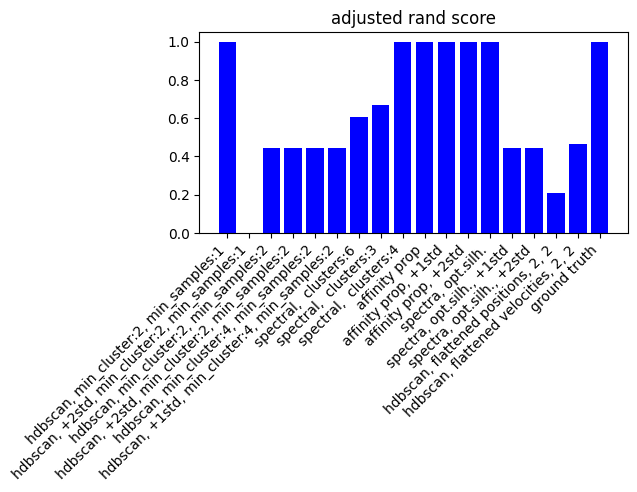

In [124]:
sim_scores = get_clustering_similarity_true(true_labels, clustering_results)
plt.bar(clustering_names, sim_scores, color='blue')
plt.xticks(rotation=45, ha='right')  

plt.tight_layout()

plt.title("adjusted rand score")

### get_clustering_similarity_true takes a similarity-function as parameter
### in case of evaluate_clustering_nr_wrong_elements, we use the Munkres-algorithm to check how many points are wrongly assigned when we fit the assigned clusters to the ground thruth clusters

Text(0.5, 1.0, 'nr. of wrong elements')

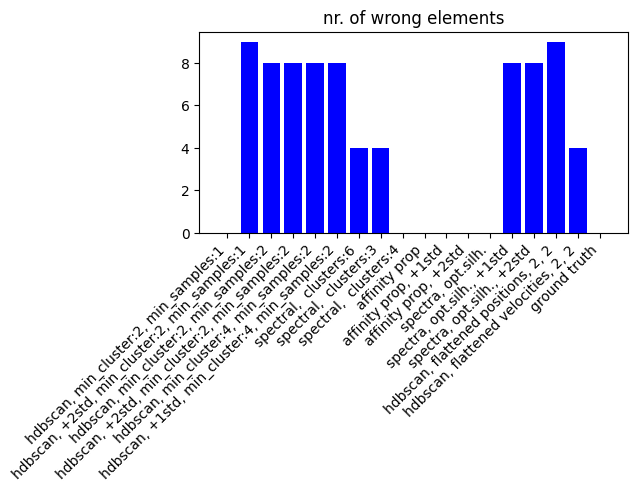

In [125]:
sim_scores = get_clustering_similarity_true(true_labels, clustering_results, evaluate_clustering_nr_wrong_elements)
plt.bar(clustering_names, sim_scores, color='blue')
plt.xticks(rotation=45, ha='right')  

plt.tight_layout()

plt.title("nr. of wrong elements")

Text(0.5, 1.0, 'NMI')

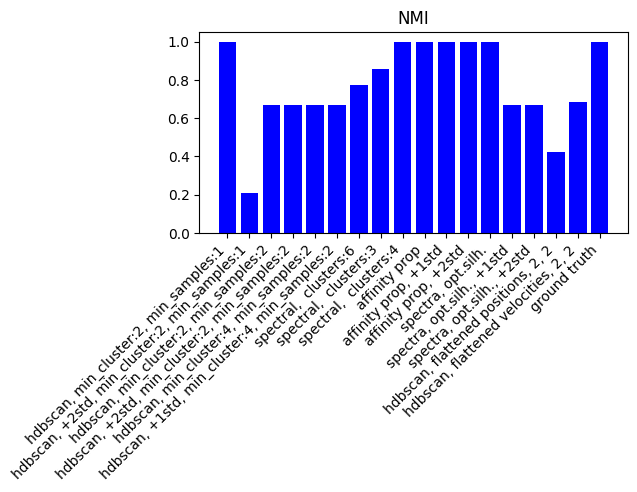

In [126]:
sim_scores = get_clustering_similarity_true(true_labels, clustering_results, sklearn.metrics.normalized_mutual_info_score)
plt.bar(clustering_names, sim_scores, color='blue')
plt.xticks(rotation=45, ha='right') 

plt.tight_layout()

plt.title("NMI")

Text(0.5, 1.0, 'number of points class. as noise')

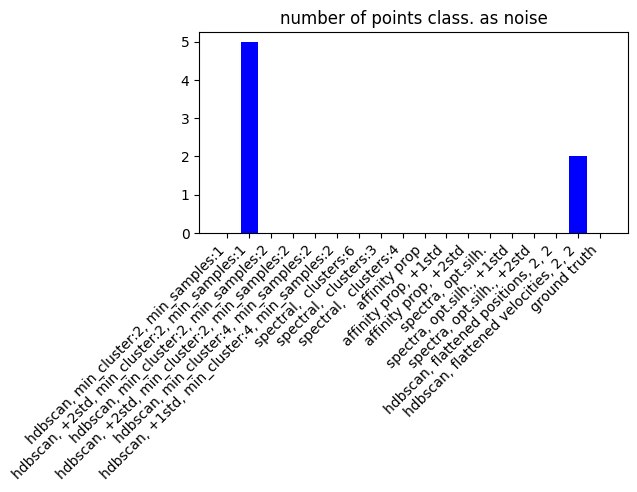

In [127]:
noise_elements = []
noise_int = -1
for res in clustering_results:
    noise_el = len(np.where(np.array(res)==noise_int)[0])
    noise_elements.append(noise_el)

plt.bar(clustering_names, noise_elements, color='blue')
plt.xticks(rotation=45, ha='right') 

plt.tight_layout()

plt.title("number of points class. as noise")

Text(0.5, 1.0, 'number of clusters')

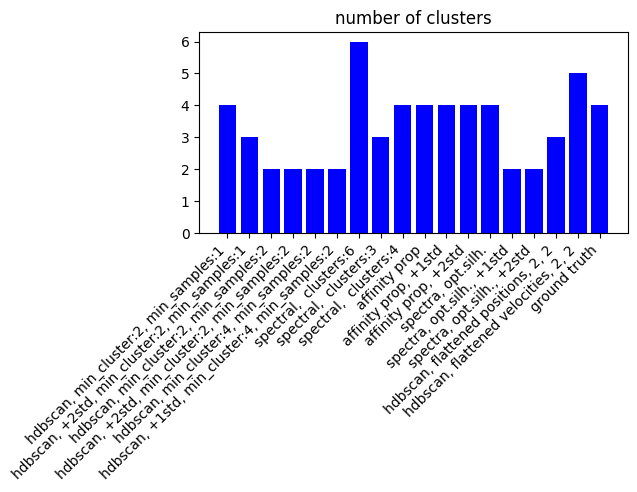

In [128]:

plt.bar(clustering_names, [len(np.unique(x)) for x in clustering_results], color='blue')
plt.xticks(rotation=45, ha='right') 

plt.tight_layout()

plt.title("number of clusters")

# Q calculations

#### computing Q for every frame is computationally very demanding - so we can specify a thinning_factor


clustering contains noise
clustering contains noise


Text(0.5, 1.0, 'Q_max from distance matrices, full, thinning=500')

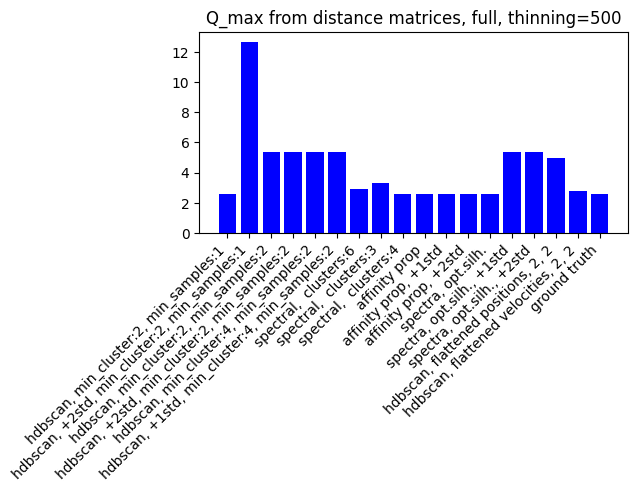

In [130]:
Qs = []
for res in clustering_results:

    new_dist_Q_max_value, _ = get_Q_for_clustering_extended(dist_matrices, np.array(res), None, use_max=True, thinning_factor=500, only_adjacent=False, reference_frame=None, return_raw=False)
    Qs.append(new_dist_Q_max_value)

plt.bar(clustering_names, Qs, color='blue')
plt.xticks(rotation=45, ha='right') 

plt.tight_layout()

plt.title("Q_max from distance matrices, full, thinning=500")

clustering contains noise
clustering contains noise


Text(0.5, 1.0, 'Q_max from distance matrices, full, thinning=500')

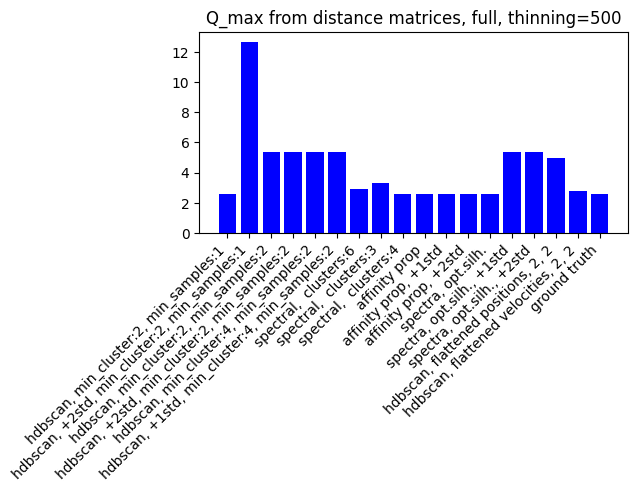

In [131]:
Qs = []
for res in clustering_results:

    new_dist_Q_max_value, _ = get_Q_for_clustering_extended(dist_matrices, np.array(res), None, use_max=True, thinning_factor=100, only_adjacent=False, reference_frame=None, return_raw=False)
    Qs.append(new_dist_Q_max_value)

plt.bar(clustering_names, Qs, color='blue')
plt.xticks(rotation=45, ha='right') 

plt.tight_layout()

plt.title("Q_max from distance matrices, full, thinning=500")

clustering contains noise
clustering contains noise


Text(0.5, 1.0, 'Q_max from distance matrices, full, thinning=1000')

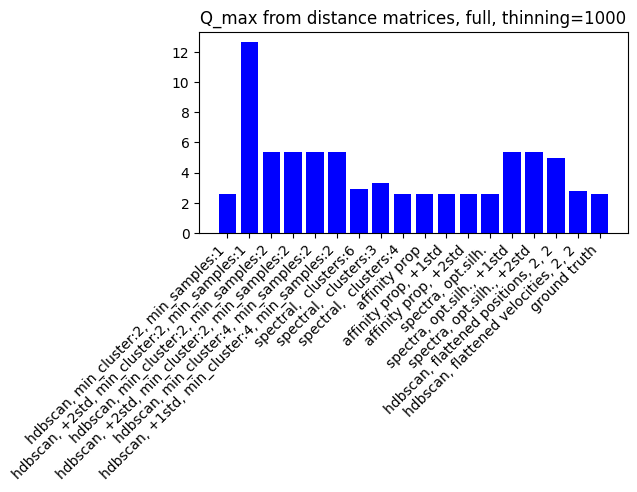

In [132]:
Qs = []
for res in clustering_results:

    new_dist_Q_max_value, _ = get_Q_for_clustering_extended(dist_matrices, np.array(res), None, use_max=True, thinning_factor=1000, only_adjacent=False, reference_frame=None, return_raw=False)
    Qs.append(new_dist_Q_max_value)

plt.bar(clustering_names, Qs, color='blue')
plt.xticks(rotation=45, ha='right') 

plt.tight_layout()

plt.title("Q_max from distance matrices, full, thinning=1000")

clustering contains noise
clustering contains noise


Text(0.5, 1.0, 'Q_mean from distance matrices, full, thinning=500')

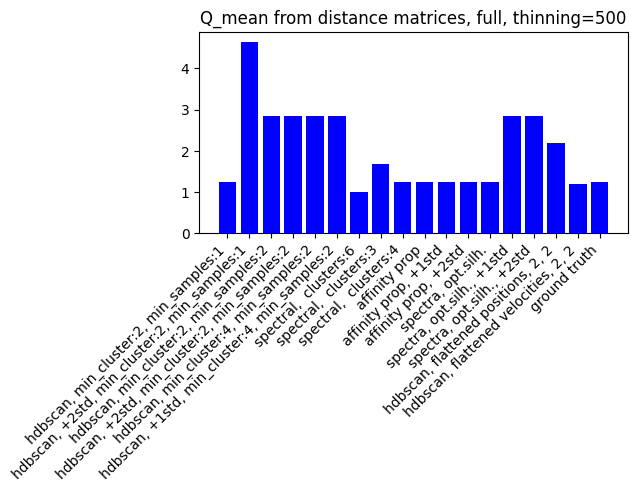

In [133]:
Qsf3= []
for res in clustering_results:

    new_dist_Q_max_value, _ = get_Q_for_clustering_extended(dist_matrices, np.array(res), None, use_max=False, thinning_factor=500, only_adjacent=False, reference_frame=None, return_raw=False)
    Qsf3.append(new_dist_Q_max_value)

plt.bar(clustering_names, Qsf3, color='blue')
plt.xticks(rotation=45, ha='right') 

plt.tight_layout()

plt.title("Q_mean from distance matrices, full, thinning=500")

clustering contains noise
clustering contains noise


Text(0.5, 1.0, 'Q_max from positions, Kabsch superimposition, full, thinning=100')

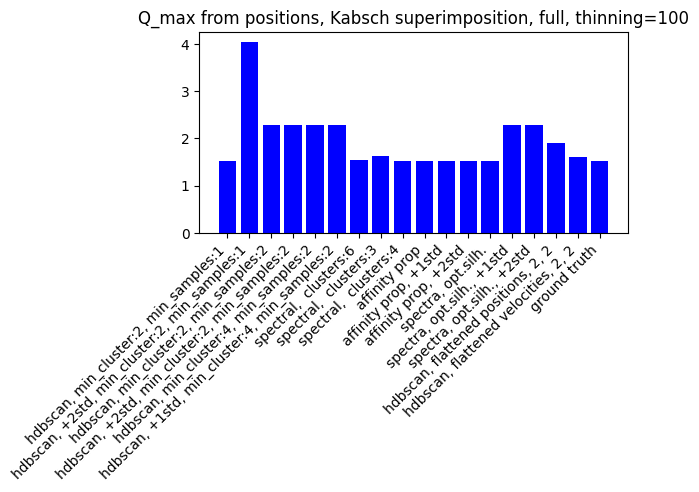

In [134]:

Qs = []

for res in clustering_results:


    new_dist_Q_max_value, _ = get_Q_for_clustering_positions(traj_array, np.array(res), None, use_max=True, apply_superimposition = "kabsch", thinning_factor=100, only_adjacent=False, reference_frame=None, return_raw=False)
    Qs.append(new_dist_Q_max_value)

plt.bar(clustering_names, Qs, color='blue')
plt.xticks(rotation=45, ha='right') 

plt.tight_layout()

plt.title("Q_max from positions, Kabsch superimposition, full, thinning=100")

clustering contains noise
clustering contains noise


Text(0.5, 1.0, 'Q_mean from positions, Kabsch superimposition, full')

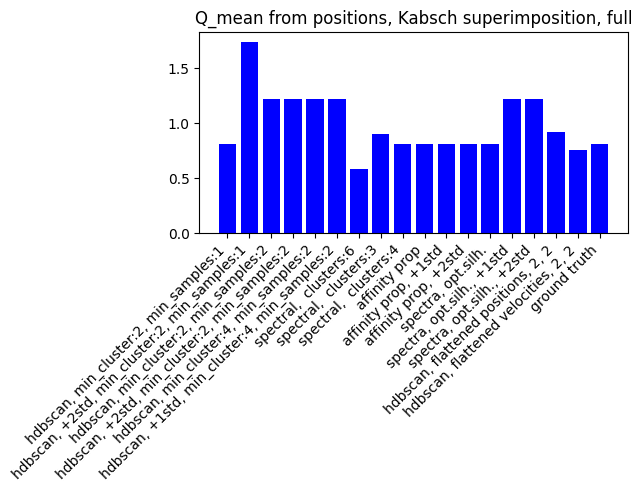

In [135]:
Qs = []

for res in clustering_results:


    new_dist_Q_max_value, _ = get_Q_for_clustering_positions(traj_array, np.array(res), None, use_max=False, apply_superimposition = "kabsch", thinning_factor=50, only_adjacent=False, reference_frame=None, return_raw=False)
    Qs.append(new_dist_Q_max_value)

plt.bar(clustering_names, Qs, color='blue')
plt.xticks(rotation=45, ha='right') 

plt.tight_layout()

plt.title("Q_mean from positions, Kabsch superimposition, full")

# q computation fuer verschiedene cluster

In [137]:
import compare_clusterings
import numpy as np
from itertools import combinations

In [138]:
from compare_clusterings import *
from manipulate_trajectory import thin_trajectory

In [168]:
current_clustering

array([0., 0., 0., 0., 1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.])

#### different superimposition methods are implemented for Q computation - depending on the superimposition (e.g. takeing rotational invariance into account) one gets, of course, very different results

#### instead of an average, we can also set a reference_frame - all frames are compared to this one

#### for each cluster, the Q-value (so either the RMSD towards the average structure of the cluster or the structure in the reference_frame) evolution across the trajectory is shown

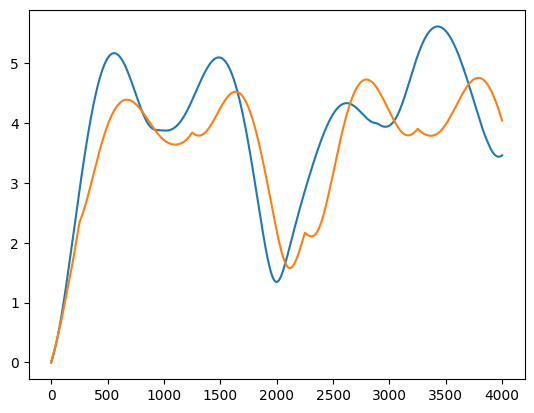

In [142]:
current_clustering = np.array(clustering_results[clustering_names.index('hdbscan, min_cluster:2, min_samples:2')])
qtraj_nosup = get_Q_for_clustering_positions(traj_array, current_clustering, None, use_max=True, center_positions=False, apply_superimposition = None, thinning_factor=None, only_adjacent=False, reference_frame=0, return_raw=True)
qtraj_center = get_Q_for_clustering_positions(traj_array, current_clustering, None, use_max=True, center_positions=True, apply_superimposition = None, thinning_factor=None, only_adjacent=False, reference_frame=0, return_raw=True)
qtraj_kabsch = get_Q_for_clustering_positions(traj_array, current_clustering, None, use_max=True, center_positions=True, apply_superimposition = "kabsch", thinning_factor=None, only_adjacent=False, reference_frame=0, return_raw=True)
qtraj_procrustes = get_Q_for_clustering_positions(traj_array, current_clustering, None, use_max=True, center_positions=True, apply_superimposition = "procrustes", thinning_factor=None, only_adjacent=False, reference_frame=0, return_raw=True)
qtraj_dist = get_Q_for_clustering_extended(dist_matrices, current_clustering, None, use_max=True, thinning_factor=None, only_adjacent=False, reference_frame=0, return_raw=True)
qtraj_dist_adj = get_Q_for_clustering_extended(dist_matrices, current_clustering, None, use_max=True, thinning_factor=None, only_adjacent=True,  return_raw=True)

for qt in qtraj_dist:
    plt.plot(qt)

In [143]:
current_clustering = np.array(clustering_results[clustering_names.index('ground truth')])

In [144]:
qtraj_nosup = get_Q_for_clustering_positions(traj_array, current_clustering, None, use_max=True, center_positions=False, apply_superimposition = None, thinning_factor=None, only_adjacent=False, reference_frame=0, return_raw=True)
qtraj_center = get_Q_for_clustering_positions(traj_array, current_clustering, None, use_max=True, center_positions=True, apply_superimposition = None, thinning_factor=None, only_adjacent=False, reference_frame=0, return_raw=True)
qtraj_kabsch = get_Q_for_clustering_positions(traj_array, current_clustering, None, use_max=True, center_positions=True, apply_superimposition = "kabsch", thinning_factor=None, only_adjacent=False, reference_frame=0, return_raw=True)
qtraj_procrustes = get_Q_for_clustering_positions(traj_array, current_clustering, None, use_max=True, center_positions=True, apply_superimposition = "procrustes", thinning_factor=None, only_adjacent=False, reference_frame=0, return_raw=True)
qtraj_dist = get_Q_for_clustering_extended(dist_matrices, current_clustering, None, use_max=True, thinning_factor=None, only_adjacent=False, reference_frame=0, return_raw=True)
qtraj_dist_adj = get_Q_for_clustering_extended(dist_matrices, current_clustering, None, use_max=True, thinning_factor=None, only_adjacent=True,  return_raw=True)



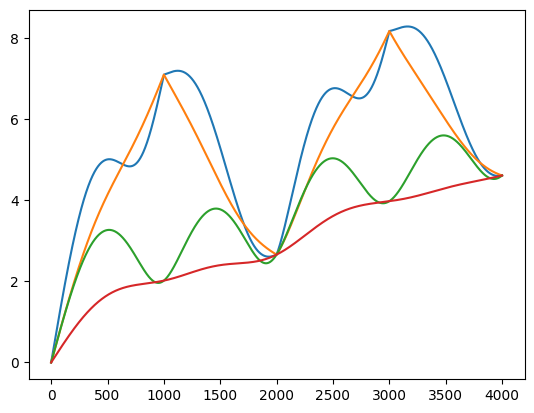

In [145]:
for qt in qtraj_nosup:
    plt.plot(qt)

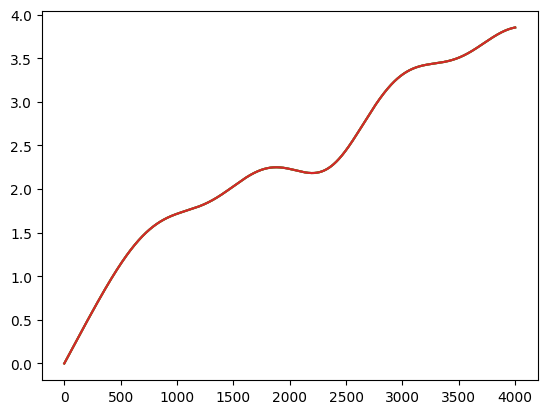

In [146]:
for qt in qtraj_center:
    plt.plot(qt)

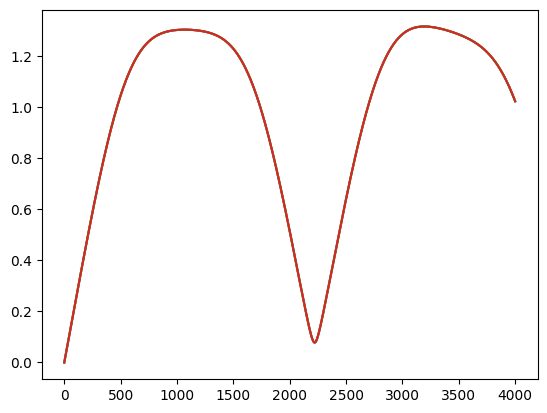

In [147]:
for qt in qtraj_kabsch:
    plt.plot(qt)

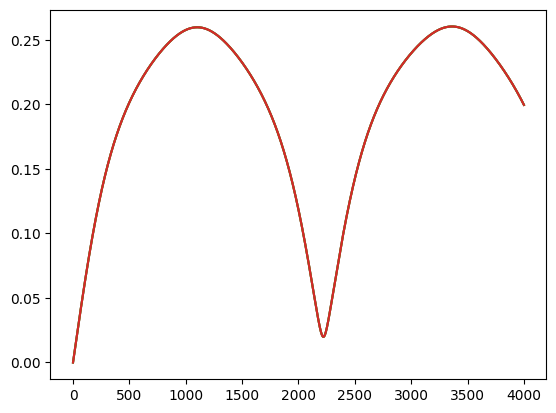

In [148]:
for qt in qtraj_procrustes:
    plt.plot(qt)

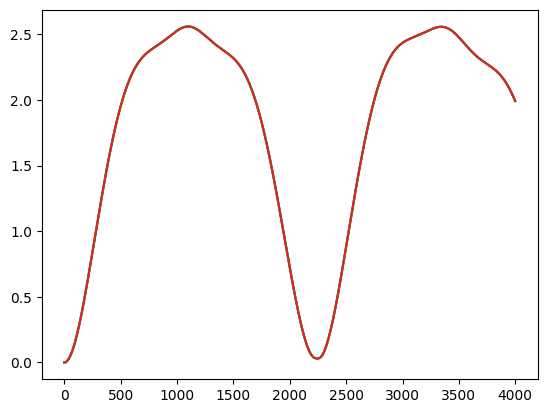

In [149]:
for qt in qtraj_dist:
    plt.plot(qt)

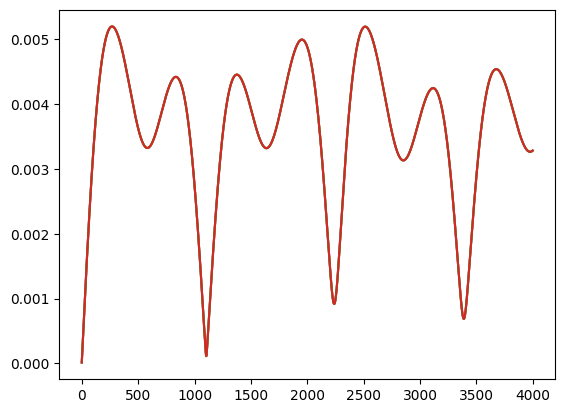

In [150]:
for qt in qtraj_dist_adj:
    plt.plot(qt)

# Comparison of the clustering approachs using heatmap

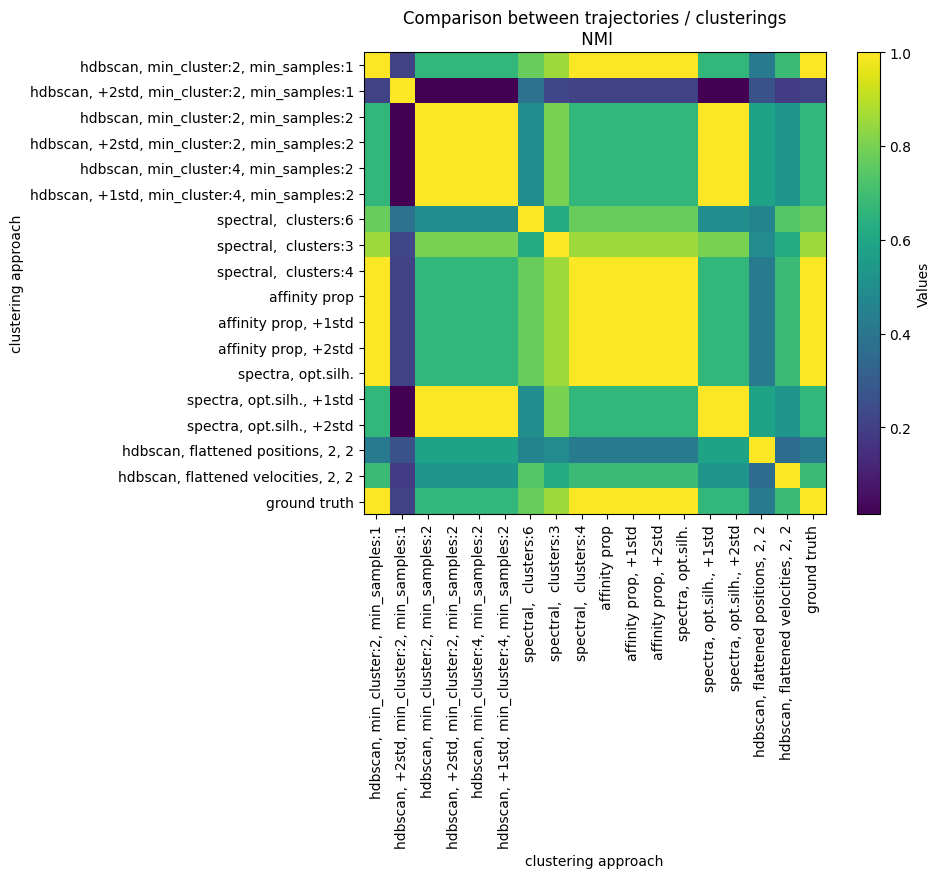

[[0, 0, 1.0],
 [0, 1, 0.2104324155732041],
 [0, 2, 0.6666666666666664],
 [0, 3, 0.6666666666666664],
 [0, 4, 0.6666666666666664],
 [0, 5, 0.6666666666666664],
 [0, 6, 0.7725179498800376],
 [0, 7, 0.857142857142857],
 [0, 8, 1.0],
 [0, 9, 1.0],
 [0, 10, 1.0],
 [0, 11, 1.0],
 [0, 12, 1.0],
 [0, 13, 0.6666666666666664],
 [0, 14, 0.6666666666666664],
 [0, 15, 0.4211970948570078],
 [0, 16, 0.6865147546474607],
 [0, 17, 1.0],
 [1, 0, 0.2104324155732041],
 [1, 1, 1.0],
 [1, 2, 0.014077412676768852],
 [1, 3, 0.014077412676768852],
 [1, 4, 0.014077412676768852],
 [1, 5, 0.014077412676768852],
 [1, 6, 0.3806518870293303],
 [1, 7, 0.22470064904913997],
 [1, 8, 0.2104324155732041],
 [1, 9, 0.2104324155732041],
 [1, 10, 0.2104324155732041],
 [1, 11, 0.2104324155732041],
 [1, 12, 0.2104324155732041],
 [1, 13, 0.014077412676768852],
 [1, 14, 0.014077412676768852],
 [1, 15, 0.25933833953699537],
 [1, 16, 0.18656282359262352],
 [1, 17, 0.2104324155732041],
 [2, 0, 0.6666666666666664],
 [2, 1, 0.0140774

In [154]:
%matplotlib inline
get_trajectory_heatmap(np.array(clustering_results), np.array(clustering_results), nmi = True, create_heatmap = True, title = "Comparison between trajectories / clusterings", names=clustering_names, heatmap_label="clustering approach")

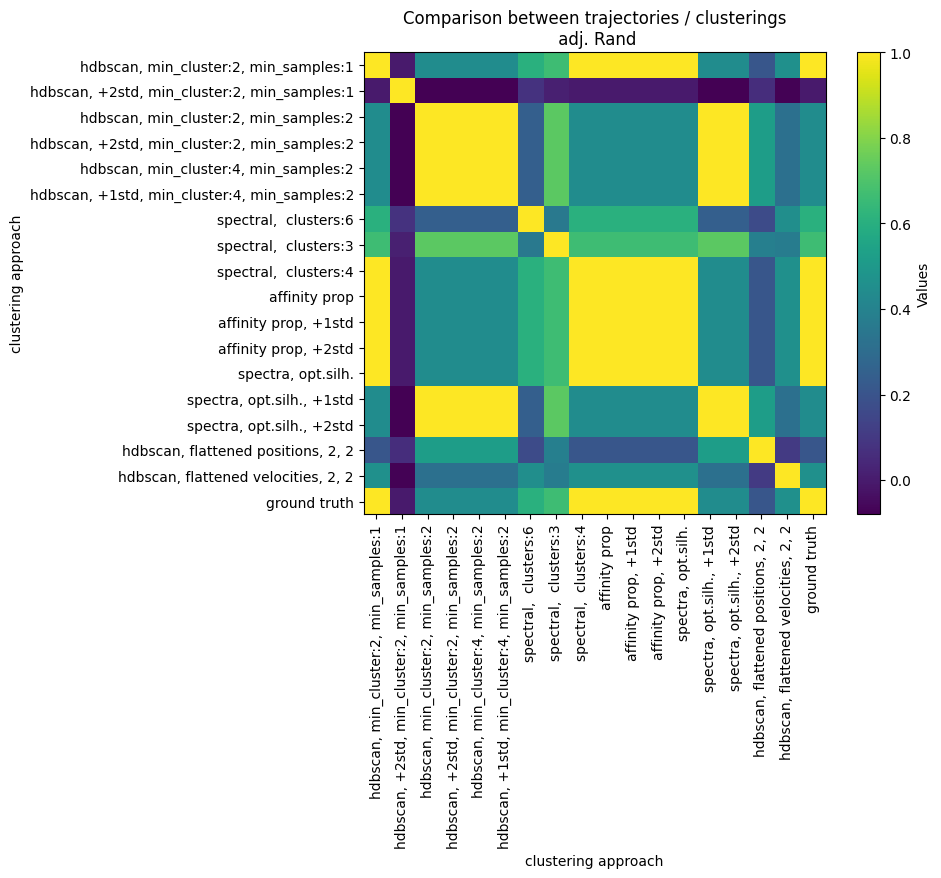

[[0, 0, 1.0],
 [0, 1, 0.0],
 [0, 2, 0.4444444444444444],
 [0, 3, 0.4444444444444444],
 [0, 4, 0.4444444444444444],
 [0, 5, 0.4444444444444444],
 [0, 6, 0.6060606060606061],
 [0, 7, 0.6666666666666666],
 [0, 8, 1.0],
 [0, 9, 1.0],
 [0, 10, 1.0],
 [0, 11, 1.0],
 [0, 12, 1.0],
 [0, 13, 0.4444444444444444],
 [0, 14, 0.4444444444444444],
 [0, 15, 0.21052631578947367],
 [0, 16, 0.4632768361581921],
 [0, 17, 1.0],
 [1, 0, 0.0],
 [1, 1, 1.0],
 [1, 2, -0.08],
 [1, 3, -0.08],
 [1, 4, -0.08],
 [1, 5, -0.08],
 [1, 6, 0.07878787878787878],
 [1, 7, 0.012903225806451613],
 [1, 8, 0.0],
 [1, 9, 0.0],
 [1, 10, 0.0],
 [1, 11, 0.0],
 [1, 12, 0.0],
 [1, 13, -0.08],
 [1, 14, -0.08],
 [1, 15, 0.06],
 [1, 16, -0.07184466019417475],
 [1, 17, 0.0],
 [2, 0, 0.4444444444444444],
 [2, 1, -0.08],
 [2, 2, 1.0],
 [2, 3, 1.0],
 [2, 4, 1.0],
 [2, 5, 1.0],
 [2, 6, 0.24561403508771928],
 [2, 7, 0.7272727272727273],
 [2, 8, 0.4444444444444444],
 [2, 9, 0.4444444444444444],
 [2, 10, 0.4444444444444444],
 [2, 11, 0.4444444

In [155]:
get_trajectory_heatmap(np.array(clustering_results), np.array(clustering_results), nmi = False, create_heatmap = True, title = "Comparison between trajectories / clusterings", names=clustering_names, heatmap_label="clustering approach")

# Plotting of one of the clusterings

In [158]:

new_plot_data = process_data.prepare_clustered_results_for_plotly(trajectories, np.array(clustering_results[0]))

In [166]:
print(f"plotted clustering: {clustering_names[0]},{clustering_results[0]}")

plotted clustering: hdbscan, min_cluster:2, min_samples:1,[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3]


In [159]:
%matplotlib notebook

ab_hsv = plot_functions.plot_traj_labels_plt(new_plot_data, save_video=True, interval = 10, color_map='Spectral', noise_label = -1, title = "\n hdbscan,2,1")

<IPython.core.display.Javascript object>

In [160]:
from IPython.display import HTML
HTML(ab_hsv.to_html5_video())